<center>

# **DSE302: Data Science and Machine Learning**
# **Final Project**


# **Identification of Exoplanets and Exomoons**

##### <font size="2">By:</font>

#### **Shaunak Padhyegurjar (19213)**
#### **Riya Rai (19234)**
#### **Yuvraj Sharma (19288)**
######  <font size="2"> *Department of Physics, IISER Bhopal* </font>

##### <font size="2">Instructor:</font>

#### Dr. Tanmay Basu
######  <font size="2"> *Assistant Professor, DSE Department, IISER Bhopal* </font>

<br>

<img src="https://dse.iiserb.ac.in/img/IISERB_Logo.png" alt="drawing" width="100"/>
</center>














# Author: Shaunak Padhyegurjar

## Importing the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
import sys
np.set_printoptions(threshold=sys.maxsize)

## Importing the data

We start by importing the training data

In [2]:
df = pd.read_csv("/Users/shaunakpadhyegurjar/Downloads/Exoplanet data/cleaned data2.csv")
df

/Users/shaunakpadhyegurjar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (20,75,76,100,101,145,194) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,...,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,shift1,shift2,shift3,shift4,shift5,shift6
0,AU Mic c,AU Mic,c,HD 197481,HIP 102409,TIC 441420236,Gaia DR2 6794047652729201024,1,1,2,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Kepler-1476 b,Kepler-1476,b,NaN,NaN,TIC 164727404,Gaia DR2 2106597487787652352,0,1,1,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Kepler-255 d,Kepler-255,d,NaN,NaN,TIC 272083669,Gaia DR2 2080202611655694336,0,1,3,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Kepler-82 e,Kepler-82,e,NaN,NaN,TIC 63372898,Gaia DR2 2125850623586710400,0,1,5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,K2-156 b,K2-156,b,NaN,NaN,TIC 176868262,Gaia DR2 3596250888028092160,1,1,1,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17964,Kepler-245 d,Kepler-245,d,NaN,NaN,TIC 63004906,Gaia DR2 2101768089124657664,0,1,4,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
17965,Kepler-28 b,Kepler-28,b,NaN,NaN,TIC 63122956,Gaia DR2 2125731464014361088,1,1,2,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
17966,Kepler-1272 b,Kepler-1272,b,NaN,NaN,TIC 399794186,Gaia DR2 2100148611573075200,0,1,1,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
17967,HD 102117 b,HD 102117,b,HD 102117,HIP 57291,TIC 267519701,Gaia DR2 5341673851394297600,0,1,1,...,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17969 entries, 0 to 17968
Columns: 288 entries, pl_name to shift6
dtypes: float64(236), int64(14), object(38)
memory usage: 39.5+ MB


Now we import the labels for training

In [5]:
labels = pd.read_csv('/Users/shaunakpadhyegurjar/Downloads/Exoplanet data/exoplanet_trn_data_targets.csv', header=None, usecols=[1])
labels

,1
0,0.1101
1,0.0932
2,0.0202
3,0.0632
4,0.0149
...,...
17964,0.1995
17965,0.0620
17966,0.0000
17967,0.1532


In [6]:
df['orbsma'] = labels # (adding the labels to the same DataFrame as the features)

## Preliminary data cleaning

In [7]:
for i in [31, 38, 46, 54, 62, 70, 78, 79, 83, 87, 91, 95, 99, 105, 109, 113, 117, 121, 137, 150, 154, 158, 162, 171, 175, 179, 183,207,204,191,187,167,149,145,141,133,129,125,74,66,58,50,42]:
    col = np.array(df.iloc[:, i])
    count = 0
    for j in range(len(col)):
        try:
            col[j] = float(col[j])
        except:
            col[j] = np.nan
            count += 1
    print(count)
    df.iloc[:, i] = col

0
0
0
0
0
0
3076
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1299
5
0
0
0
0
0
0
0
0
0


In [8]:
nans_where = np.array(df.isna().sum())
print(nans_where)

[    0     0     0 16461 16309   290   451     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0   453   563   569  2313 14508
 14513  1913  3774  3857  3857  3766 15320 15362 15362 15406 16283 16388
 16385 16280 16283 16393 16383 16328 16349 16540 16537 16346 16350 16545
 16549 16407 17891 17894 17894 17891 17891 17889 17882 17724 14729 15021
 15016 14724 14730 15026 15021 14732 17872 16793 16836 16829 16777  3766
 16077 16046  3780  7909  7928  7926  5851  5157 16843 16840  5159  4925
 16517 16516  4868  2143  2172  2111  2055  1592   134  4679  4685  4646
  4731  5930  8028  8027  5905  4813  6854  6849  4731  5218  5223  5185
  5168  5097  5118  5086  5180 17941 17943 17938 17893 16934 16980 16975
 16909 16221 16386 16381  4647 15482 15521 15526 15574 17897 17898 17900
 17901 17955 17941 17692 15764 17969   719  1022  1162   719  1026  2487
  2551  1026   908  2589  2653   908  4675  5092  5

In [9]:
print(np.size(np.where(nans_where > 5000)[0]))

149


In [10]:
df.drop(df.columns[np.where(nans_where > 5000)[0]], axis=1, inplace=True)
df

,pl_name,hostname,pl_letter,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,orbsma
0,AU Mic c,AU Mic,c,TIC 441420236,Gaia DR2 6794047652729201024,1,1,2,0,0,...,2021-08-10,2021-05,2021-08-10,2.0,1.0,0.0,1.0,0.0,0.0,0.1101
1,Kepler-1476 b,Kepler-1476,b,TIC 164727404,Gaia DR2 2106597487787652352,0,1,1,0,0,...,2015-08-25,2015-09-24,2015-08-25,1.0,0.0,0.0,0.0,0.0,0.0,0.0932
2,Kepler-255 d,Kepler-255,d,TIC 272083669,Gaia DR2 2080202611655694336,0,1,3,0,0,...,2014-11-21,2014-12-18,2014-11-21,1.0,0.0,0.0,0.0,0.0,0.0,0.0202
3,Kepler-82 e,Kepler-82,e,TIC 63372898,Gaia DR2 2125850623586710400,0,1,5,0,0,...,2014-11-18,2014-12-04,2014-11-18,1.0,0.0,0.0,0.0,0.0,0.0,0.0632
4,K2-156 b,K2-156,b,TIC 176868262,Gaia DR2 3596250888028092160,1,1,1,0,0,...,2018-07-12,2018-08,2018-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17964,Kepler-245 d,Kepler-245,d,TIC 63004906,Gaia DR2 2101768089124657664,0,1,4,0,0,...,2014-11-21,2014-12-18,2014-11-21,1.0,0.0,0.0,0.0,0.0,0.0,0.1995
17965,Kepler-28 b,Kepler-28,b,TIC 63122956,Gaia DR2 2125731464014361088,1,1,2,0,0,...,2014-05-14,2012-04,2014-05-14,1.0,0.0,0.0,0.0,0.0,0.0,0.0620
17966,Kepler-1272 b,Kepler-1272,b,TIC 399794186,Gaia DR2 2100148611573075200,0,1,1,0,0,...,2019-04-16,2019-03,2019-04-18,1.0,0.0,0.0,0.0,0.0,0.0,0.0000
17967,HD 102117 b,HD 102117,b,TIC 267519701,Gaia DR2 5341673851394297600,0,1,1,0,0,...,2018-04-25,2006-07,2014-05-14,2.0,1.0,3.0,0.0,0.0,0.0,0.1532


In [11]:
np.array(df.columns)

array(['pl_name', 'hostname', 'pl_letter', 'tic_id', 'gaia_id',
       'default_flag', 'sy_snum', 'sy_pnum', 'sy_mnum', 'cb_flag',
       'discoverymethod', 'disc_year', 'disc_pubdate', 'disc_locale',
       'disc_facility', 'disc_telescope', 'disc_instrument', 'rv_flag',
       'pul_flag', 'ptv_flag', 'tran_flag', 'ast_flag', 'obm_flag',
       'micro_flag', 'etv_flag', 'ima_flag', 'dkin_flag', 'soltype',
       'pl_controv_flag', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_orbperlim', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_orbeccen', 'pl_orbeccenlim',
       'pl_orbincl', 'pl_orbincllim', 'pl_tranmid', 'pl_tranmiderr1',
       'pl_tranmiderr2', 'pl_tranmidlim', 'pl_tsystemref', 'ttv_flag',
       'pl_imppar', 'pl_impparerr1', 'pl_impparerr2', 'pl_impparlim',
       'pl_trandur', 'pl_trandurlim', 'pl_orblperlim', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radli

## Feature Selection

Now that we have reliable features, we will now further analyse them and drop the ones that do not correlate with the target variable.

### Checking correlation of metadata with the target variable

First few columns of the data contains the metadata of each exoplanet. This metadata contains information like Name, Id number, Instrument and Telescope used for detection, etc of the exoplanet. Intuitively we can say that this is completely unrelated to the target variable but we show that it is unrelated as below and thus these variables can be dropped.

First we convert the categorical data to numeric values as follows:

In [12]:
testcols1 = ['pl_name', 'hostname', 'pl_letter', 'tic_id', 'gaia_id', 
             'discoverymethod', 'disc_locale', 'disc_facility', 'disc_telescope', 'disc_instrument', 'soltype']

print(df[testcols1].dtypes)

for column in df[testcols1]:
    df[column] = pd.Categorical(df[column])
    df[column] = df[column].cat.codes

print(df[testcols1].dtypes)

pl_name            object
hostname           object
pl_letter          object
tic_id             object
gaia_id            object
discoverymethod    object
disc_locale        object
disc_facility      object
disc_telescope     object
disc_instrument    object
soltype            object
dtype: object
pl_name            int16
hostname           int16
pl_letter           int8
tic_id             int16
gaia_id            int16
discoverymethod     int8
disc_locale         int8
disc_facility       int8
disc_telescope      int8
disc_instrument     int8
soltype             int8
dtype: object


In [13]:
df

,pl_name,hostname,pl_letter,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,orbsma
0,43,32,1,2869,3169,1,1,2,0,0,...,2021-08-10,2021-05,2021-08-10,2.0,1.0,0.0,1.0,0.0,0.0,0.1101
1,2039,1610,0,1049,1341,0,1,1,0,0,...,2015-08-25,2015-09-24,2015-08-25,1.0,0.0,0.0,0.0,0.0,0.0,0.0932
2,2850,2212,2,1890,713,0,1,3,0,0,...,2014-11-21,2014-12-18,2014-11-21,1.0,0.0,0.0,0.0,0.0,0.0,0.0202
3,3832,2820,3,3130,1464,0,1,5,0,0,...,2014-11-18,2014-12-04,2014-11-18,1.0,0.0,0.0,0.0,0.0,0.0,0.0632
4,1091,851,0,1200,2438,1,1,1,0,0,...,2018-07-12,2018-08,2018-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17964,2819,2201,2,3063,1045,0,1,4,0,0,...,2014-11-21,2014-12-18,2014-11-21,1.0,0.0,0.0,0.0,0.0,0.0,0.1995
17965,2917,2239,0,3088,1454,1,1,2,0,0,...,2014-05-14,2012-04,2014-05-14,1.0,0.0,0.0,0.0,0.0,0.0,0.0620
17966,1769,1385,0,2677,920,0,1,1,0,0,...,2019-04-16,2019-03,2019-04-18,1.0,0.0,0.0,0.0,0.0,0.0,0.0000
17967,393,317,0,1602,2838,0,1,1,0,0,...,2018-04-25,2006-07,2014-05-14,2.0,1.0,3.0,0.0,0.0,0.0,0.1532


Now we compute the correlation matrix of the metadata variables with the target variable.

In [14]:
corr_cols1 = df[['orbsma', 'pl_name', 'hostname', 'pl_letter', 'tic_id', 'gaia_id',
                 'default_flag', 'sy_pnum', 'sy_mnum', 'cb_flag', 'discoverymethod', 'disc_year',
                 'disc_pubdate', 'disc_locale', 'disc_facility', 'disc_telescope', 'disc_instrument', 'rv_flag',
                 'pul_flag', 'ptv_flag', 'tran_flag', 'ast_flag', 'obm_flag', 'micro_flag', 'etv_flag', 'ima_flag',
                 'dkin_flag', 'soltype']]

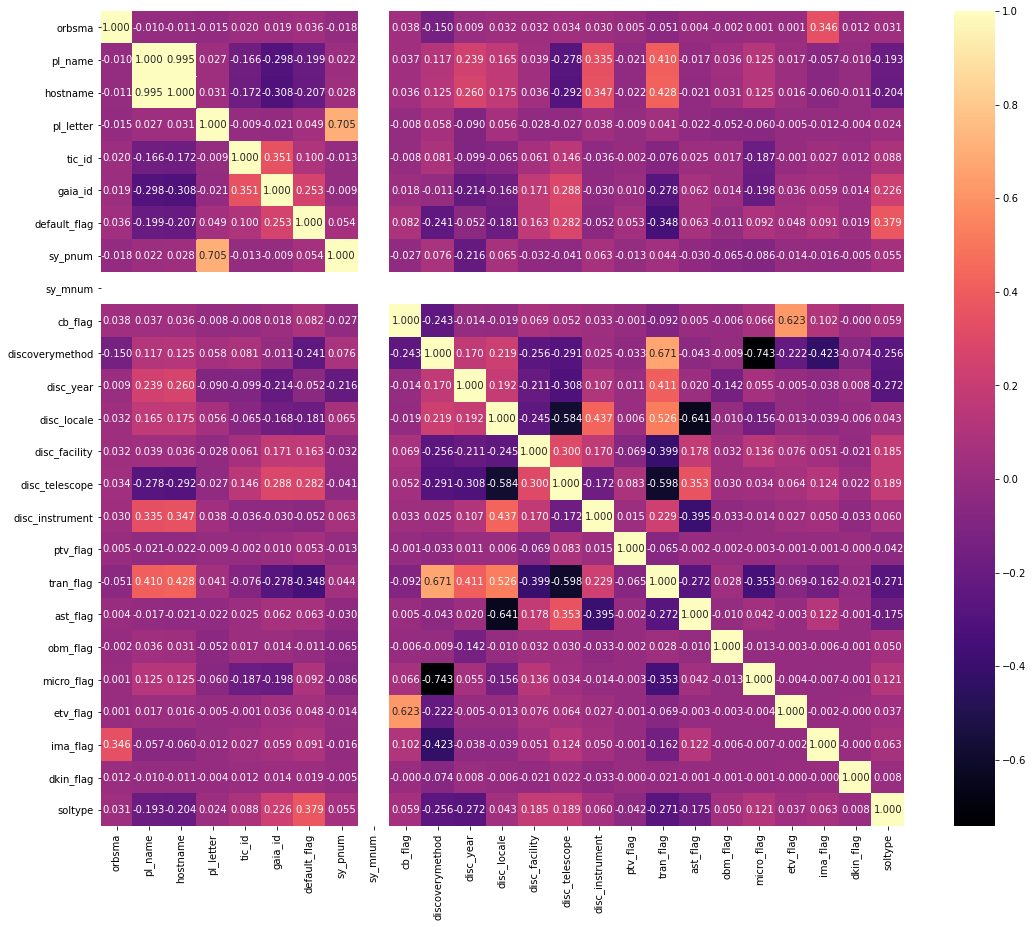

In [15]:
plt.figure(figsize=(18, 15))
sns.heatmap(corr_cols1.corr(),annot=True,cmap = 'magma',fmt='.3f')
plt.show()

### Checking correlation of errors in variables with the target variable

The data contains some measureable quantities and their upper and lower uncertainties (errors). For each measureable quantity, there are three columns containing the information about the error in that quantity. These errors are associated with the measurement itself and are essentially random. Hence we expect no correlation between these errors and the target variable, and hence can be dropped. We prove this statement below.

We chose the three error columns associated with the variable **'pl_tranmid'** and found that they have no correlation with the target variable. Since the error columns of other quantities will behave in a similar way, we have shown the correlation matrix only for the above mentioned three error columns and not for all. We can assume that other error columns are also not correlated and can be dropped.

In [16]:
corr_cols2 = df[['orbsma', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2']]

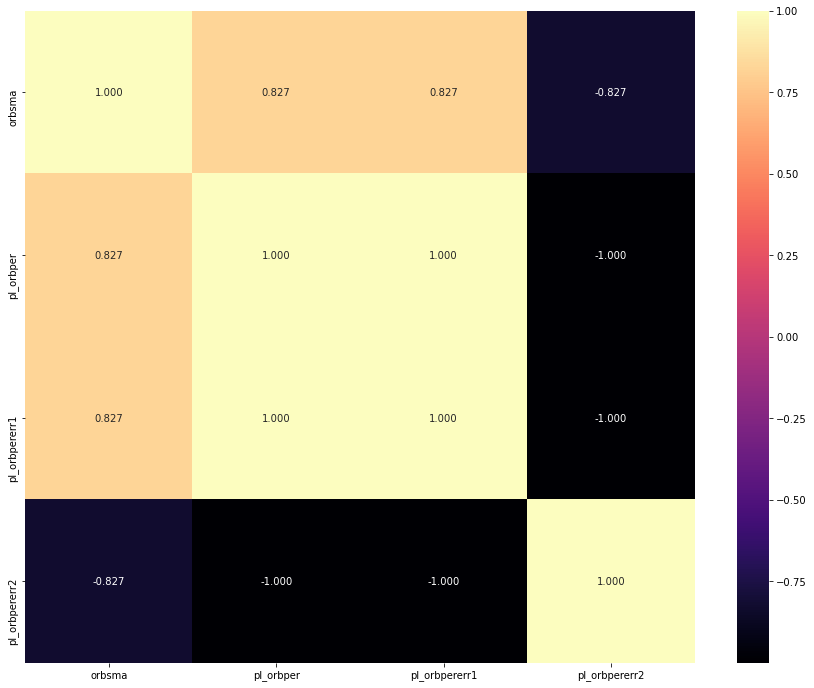

In [17]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr_cols2.corr(),annot=True,cmap = 'magma',fmt='.3f')
plt.show()

### Checking correlation of other variables with the target variable

The data contains some other variables that are physically not related to the orbital semi-major axis of an exoplanet. We check for correlation of these with the target variable. 

In [18]:
corr_cols3 = df[['orbsma', 'ra', 'dec', 'glat', 'glon', 'elat', 'elon', 'sy_pm', 'sy_pmra', 'sy_pmdec', 'sy_dist', 'sy_plx', 'sy_bmag', 'sy_vmag',
                 'sy_jmag', 'sy_hmag', 'sy_kmag', 'sy_w2mag', 'sy_w3mag', 'sy_w4mag', 'sy_gaiamag', 'sy_tmag', 
                 'sy_kepmag', 'rowupdate', 'pl_pubdate', 'releasedate', 'pl_nnotes', 'st_nphot', 'st_nrvc', 'st_nspec', 'pl_nespec', 'pl_ntranspec']]

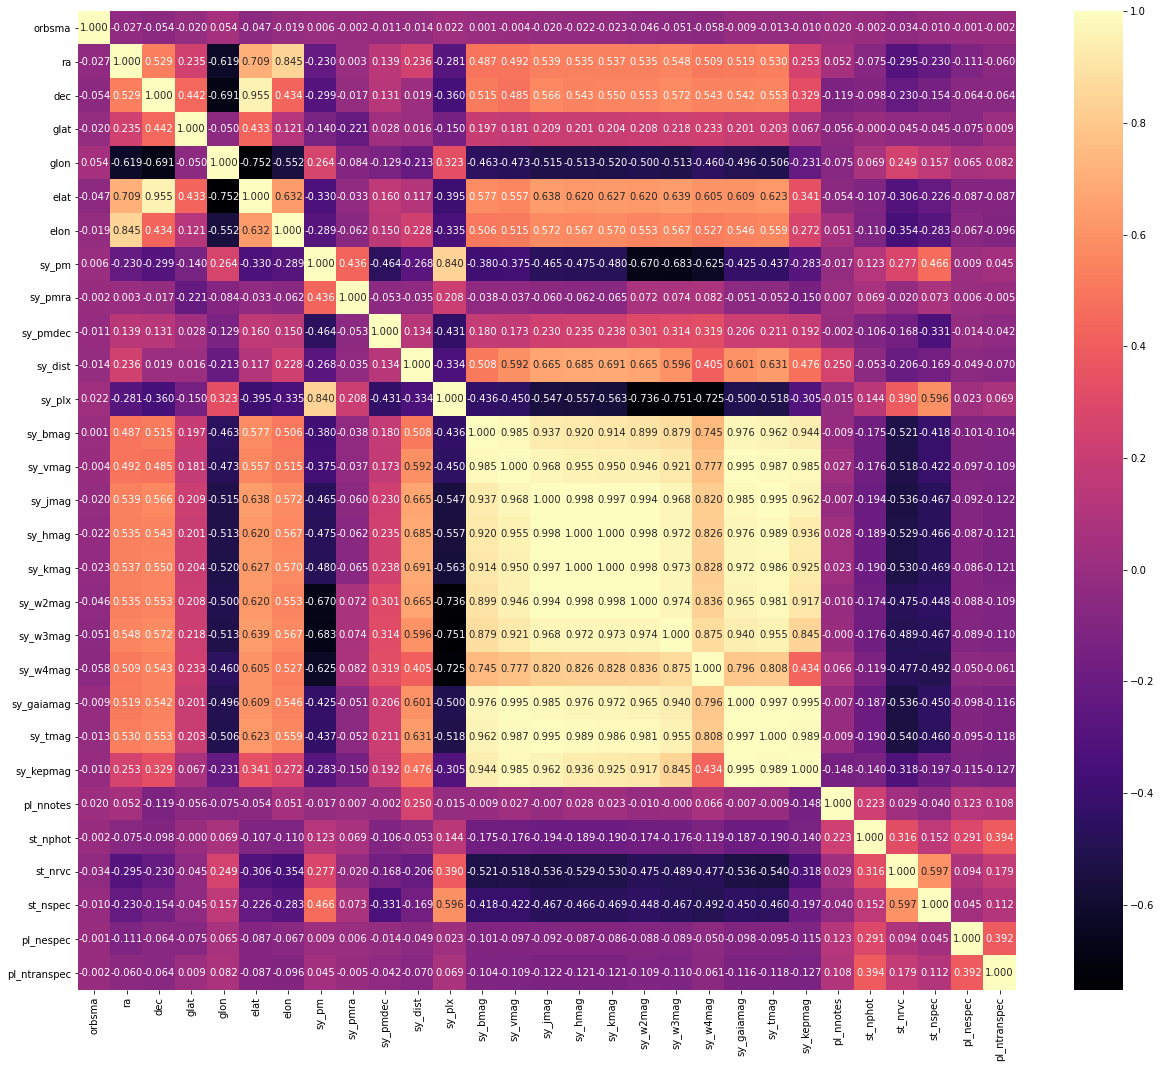

In [19]:
plt.figure(figsize=(21, 18))
sns.heatmap(corr_cols3.corr(),annot=True,cmap = 'magma',fmt='.3f')
plt.show()

From the above correlation matrix, we see that these variables are completely unrelated to the target variable and hence they can be dropped. 

### Dropping the columns which are not required

Finally, we drop the unwanted columns that we discovered in the above analysis.

In [20]:
df.drop(df[['pl_letter', 'tic_id', 'gaia_id', 'default_flag', 'sy_snum', 'sy_pnum', 'sy_mnum', 'cb_flag', 'discoverymethod', 'disc_year',
            'disc_pubdate', 'disc_locale', 'disc_facility', 'disc_telescope', 'disc_instrument', 'rv_flag', 'pul_flag', 'ptv_flag',
            'tran_flag', 'ast_flag', 'obm_flag', 'micro_flag', 'etv_flag', 'ima_flag', 'dkin_flag', 'soltype']], inplace=True, axis=1)
df.drop(df[['pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim']], inplace=True, axis=1)
df.drop(df[['ra', 'dec', 'glat', 'glon', 'elat', 'elon', 'sy_pm', 'sy_pmra', 'sy_pmdec', 'sy_dist', 'sy_plx', 'sy_bmag', 'sy_vmag',
            'sy_jmag', 'sy_hmag', 'sy_kmag', 'sy_w2mag', 'sy_w3mag', 'sy_w4mag', 'sy_gaiamag', 'sy_tmag', 'sy_kepmag', 'rowupdate',
            'pl_pubdate', 'releasedate', 'pl_nnotes', 'st_nphot', 'st_nrvc', 'st_nspec', 'pl_nespec', 'pl_ntranspec']], inplace=True, axis=1)
df

,pl_name,hostname,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmaxlim,pl_rade,pl_radeerr1,...,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w2magerr1,sy_w2magerr2,sy_gaiamagerr1,sy_gaiamagerr2,sy_tmagerr1,sy_tmagerr2,orbsma
0,43,32,0,18.859019,0.000016,-0.000016,0.0,0.0,3.24,0.16,...,NaN,NaN,NaN,NaN,NaN,0.000731,-0.000731,0.0320,-0.0320,0.1101
1,2039,1610,0,10.358632,0.000059,-0.000059,0.0,0.0,1.80,0.71,...,13.652,0.023,-0.023,0.026,-0.026,0.000372,-0.000372,0.0065,-0.0065,0.0932
2,2850,2212,0,1.045623,0.000003,-0.000003,0.0,0.0,1.37,0.53,...,13.717,0.025,-0.025,0.031,-0.031,0.000449,-0.000449,0.0079,-0.0079,0.0202
3,3832,2820,0,5.902247,0.000007,-0.000007,0.0,0.0,2.55,1.06,...,13.420,0.024,-0.024,0.029,-0.029,0.000370,-0.000370,0.0088,-0.0088,0.0632
4,1091,851,0,0.813140,0.000070,-0.000080,0.0,0.0,1.15,0.10,...,10.350,0.023,-0.023,0.021,-0.021,0.000586,-0.000586,0.0061,-0.0061,0.0149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17964,2819,2201,0,36.275947,0.000084,-0.000084,0.0,0.0,3.50,1.48,...,13.427,0.023,-0.023,0.029,-0.029,0.000697,-0.000697,0.0078,-0.0078,0.1995
17965,2917,2239,0,5.912300,NaN,NaN,0.0,0.0,3.60,NaN,...,12.635,0.023,-0.023,0.023,-0.023,0.000497,-0.000497,0.0062,-0.0062,0.0620
17966,1769,1385,0,51.132330,0.000358,-0.000358,NaN,NaN,NaN,NaN,...,12.806,0.024,-0.024,0.023,-0.023,0.000250,-0.000250,0.0068,-0.0068,0.0000
17967,393,317,0,20.813300,0.006400,-0.006400,0.0,0.0,NaN,NaN,...,5.820,0.124,-0.124,0.045,-0.045,0.000223,-0.000223,0.0060,-0.0060,0.1532


In [21]:
np.array(df.columns)

array(['pl_name', 'hostname', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmaxlim',
       'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim',
       'pl_orbeccen', 'pl_orbeccenlim', 'pl_orbincl', 'pl_orbincllim',
       'pl_tranmid', 'pl_tsystemref', 'ttv_flag', 'pl_imppar',
       'pl_impparerr1', 'pl_impparerr2', 'pl_impparlim', 'pl_trandur',
       'pl_trandurlim', 'pl_orblperlim', 'st_teff', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2',
       'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim',
       'st_met', 'st_metlim', 'st_metratio', 'st_logg', 'st_loggerr1',
       'st_loggerr2', 'st_logglim', 'st_agelim', 'st_denslim',
       'sy_refname', 'rastr', 'decstr', 'sy_pmerr1', 'sy_pmerr2',
       'sy_pmraerr1', 'sy_pmraerr2', 'sy_pmdecerr1', 'sy_pmdecerr2',
       'sy_disterr1', 'sy_disterr2', 'sy_plxerr1', 'sy_plxerr2',
       'sy_bmagerr1', 'sy_bmagerr2', 'sy_vmager

The resulting data still contains many error columns and other unwanted columns which we now discard.

In [22]:
df.drop(df[['pl_controv_flag', 'pl_orbperlim', 'pl_orbsmaxlim', 'pl_tsystemref', 'ttv_flag', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 
            'st_raderr1', 'st_raderr2', 'st_radlim', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_metlim', 'st_loggerr1', 'st_logglim', 
            'sy_refname', 'rastr', 'decstr', 'sy_pmerr1', 'sy_pmerr2', 'sy_pmraerr1', 'sy_pmraerr2', 'sy_pmdecerr1', 'sy_pmdecerr2', 'sy_disterr1',
            'sy_disterr2', 'sy_plxerr1', 'sy_plxerr2', 'sy_bmagerr1', 'sy_bmagerr2', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_jmagerr1', 'sy_jmagerr2',
            'sy_hmagerr1', 'sy_hmagerr2', 'sy_kmagerr1', 'sy_kmagerr2', 'sy_w1magerr1', 'sy_w1magerr2', 'sy_w2magerr1', 'sy_w2magerr2', 'sy_gaiamagerr1',
            'sy_gaiamagerr2', 'sy_tmagerr1', 'sy_tmagerr2']], inplace=True, axis=1)

df

,pl_name,hostname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_orbeccen,...,st_rad,st_mass,st_met,st_metratio,st_logg,st_loggerr2,st_agelim,st_denslim,sy_w1mag,orbsma
0,43,32,18.859019,0.000016,-0.000016,3.24,0.16,-0.16,0.0,0.000,...,0.75,0.50,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.1101
1,2039,1610,10.358632,0.000059,-0.000059,1.80,0.71,-0.21,0.0,0.000,...,1.02,1.00,-0.020,[Fe/H],4.42,-0.27,0.0,0.0,13.652,0.0932
2,2850,2212,1.045623,0.000003,-0.000003,1.37,0.53,-0.10,0.0,0.000,...,0.89,1.01,0.210,[Fe/H],4.55,-0.29,0.0,0.0,13.717,0.0202
3,3832,2820,5.902247,0.000007,-0.000007,2.55,1.06,-0.23,0.0,0.000,...,0.93,0.97,-0.020,[Fe/H],4.49,-0.28,0.0,0.0,13.420,0.0632
4,1091,851,0.813140,0.000070,-0.000080,1.15,0.10,-0.07,0.0,NaN,...,0.66,0.66,-0.250,[Fe/H],4.62,-0.01,NaN,NaN,10.350,0.0149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17964,2819,2201,36.275947,0.000084,-0.000084,3.50,1.48,-0.40,0.0,0.000,...,0.87,0.80,-0.020,[Fe/H],4.46,-0.33,0.0,0.0,13.427,0.1995
17965,2917,2239,5.912300,NaN,NaN,3.60,NaN,NaN,0.0,NaN,...,0.70,0.75,0.340,[M/H],4.29,NaN,NaN,NaN,12.635,0.0620
17966,1769,1385,51.132330,0.000358,-0.000358,NaN,NaN,NaN,NaN,NaN,...,1.51,1.04,NaN,NaN,4.10,NaN,NaN,0.0,12.806,0.0000
17967,393,317,20.813300,0.006400,-0.006400,NaN,NaN,NaN,NaN,0.121,...,NaN,1.11,0.295,[Fe/H],4.37,-0.06,NaN,NaN,5.820,0.1532


Now we fill the NaN values in each column of the resulting data with the mean of other values in the respective columns.

In [23]:
# df = df.apply(lambda x: x.fillna(x.median()),axis=1)

In [24]:
a = np.array(df.columns)

median_com=[]

for i in range(len(a)):
    cnt = 0
    for row in df.iloc[:, i]:
        try:
            float(row)
            pass
        except:
            df.iloc[cnt, i] = np.nan
        cnt += 1
        row=str(row)  
        
for i in range(0,len(a)):
    b=[]
    b=np.array(df.iloc[:,i],dtype=float)
    median_com.append(np.nanmedian(b))

for i in range(0,len(a),1):
    df.iloc[:,i].fillna(value=median_com[i],inplace=True)

/Users/shaunakpadhyegurjar/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


We now compute the correlation matrix of the resulting data to find the useful parameters that can be used for modelling.

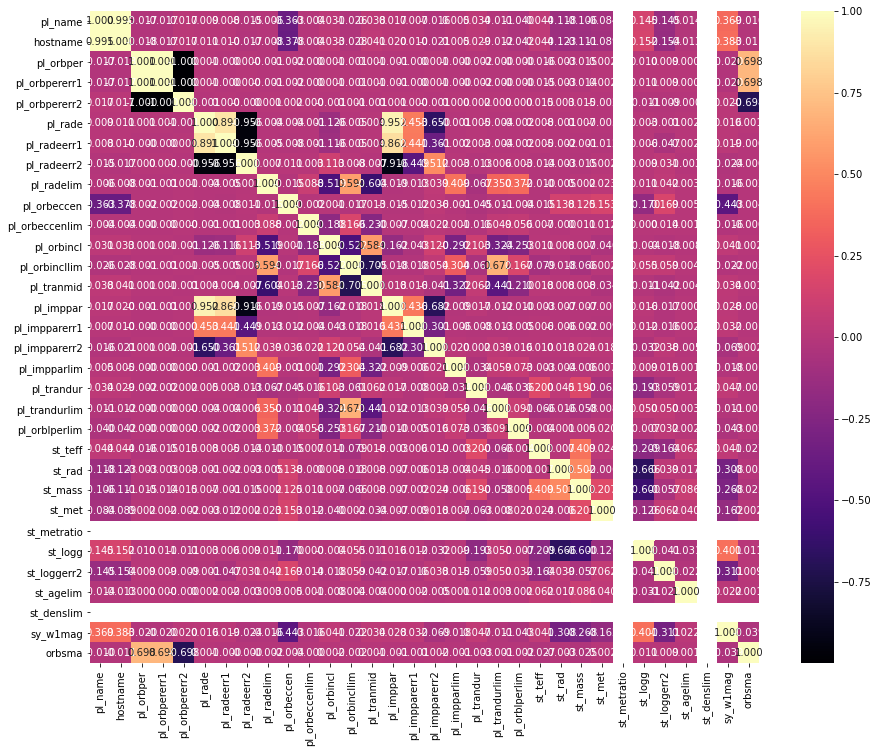

In [25]:
# corr_cols4 = df[['pl_orbper', 'pl_imppar', 'st_teff', 'st_rad', 'st_mass', 'st_logg', 'orbsma']]

plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(),annot=True,cmap = 'magma',fmt='.3f')
plt.show()

We see that the variables **"pl_orbper"** and **"pl_imppar"** correlate well with the target variable and hence these will be used to for modelling.

## Models

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 

In [27]:
data = df[['pl_orbper', 'pl_orbpererr1']]
labels = df['orbsma']

In [28]:
data

,pl_orbper,pl_orbpererr1
0,18.859019,0.000016
1,10.358632,0.000059
2,1.045623,0.000003
3,5.902247,0.000007
4,0.813140,0.000070
...,...,...
17964,36.275947,0.000084
17965,5.912300,0.000050
17966,51.132330,0.000358
17967,20.813300,0.006400


In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

### Linear Regression

In [30]:
regressor = LinearRegression()

# Fitting the training data
regressor.fit(X_train, y_train)

# Printing the fitted parameters
print('Coefficients: \n\n',regressor.coef_)
print('\n Intercept:\n\n',regressor.intercept_)

# Prediction using the testing dataset
y_pred = regressor.predict(X_test)
# print('\n', 'Predicted values: \n\n', y_pred)

Coefficients: 

 [ 2.44534728e-05 -4.94819719e-06]

 Intercept:

 1.3243794986127644


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2) 

102.49833036480287 -0.0017187189842593487


### Decision Tree Regression

In [32]:
dtregressor = DecisionTreeRegressor()
dtregressor.fit(X_train, y_train)

y_pred = dtregressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2) 

135.29503025886197 -0.3222416786057516


#### Grid Searching DTR

In [33]:
# defining parameter range 
param_grid = [{'max_depth': [1,2,3,4,5], 
                'min_samples_split': [2,4,6,8,10]}]


clf = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
# fitting the model for grid search 
clf.fit(X_train, y_train) 
# print best parameter after tuning 
print(clf.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(clf.best_estimator_) 

grid_predictions_dt = clf.predict(X_test) 
  
mse = mean_squared_error(y_test, grid_predictions_dt)
r2 = r2_score(y_test, grid_predictions_dt)
print(mse, r2) 

{'max_depth': 5, 'min_samples_split': 4}
DecisionTreeRegressor(max_depth=5, min_samples_split=4)
132.81231453276445 -0.2979780363796096


### Random Forest Regression

In [34]:
rfregressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
rfregressor.fit(X_train, y_train) 

y_pred = dtregressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2) 

135.29503025886197 -0.3222416786057516


#### Grid Searching RFR

In [35]:
# defining parameter range 
param_grid = [{'max_depth': [1,2,3,4,5], 
                'min_samples_split': [2,4,6,8,10],
               'n_estimators': [100,200,250,500,1000]}]


rf = GridSearchCV(RandomForestRegressor(random_state = 42), param_grid, cv=5)
# fitting the model for grid search 
rf.fit(X_train, y_train) 
# print best parameter after tuning 
print(rf.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(rf.best_estimator_) 

grid_predictions_rf = rf.predict(X_test) 
  
mse = mean_squared_error(y_test, grid_predictions_rf)
r2 = r2_score(y_test, grid_predictions_rf)
print(mse, r2) 

{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 1000}
RandomForestRegressor(max_depth=1, n_estimators=1000, random_state=42)
161.02564935532203 -0.5737076557415974


### Support Vector Regressor

In [36]:
svrregressor = SVR(kernel='rbf')
svrregressor.fit(X_train,y_train)

#5 Predicting a new result

y_pred = svrregressor.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2) 

102.51998186339542 -0.0019303196157725022


#### Grid Searching SVR

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1,1,2, 5, 8, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 


grid = GridSearchCV(SVR(), param_grid, verbose = False, cv = 5) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions_svr = grid.predict(X_test) 
  
mse = mean_squared_error(y_test, grid_predictions_svr)
r2 = r2_score(y_test, grid_predictions_svr)
print(mse, r2) 